In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from amb_scripts.load_saved_info import *
from amb_scripts.plot_csfv3 import *

from dag_prf_utils.prfpy_functions import *
from dag_prf_utils.plot_functions import *
from dag_prf_utils.utils import *
from dag_prf_utils.mesh_maker import *
from dag_prf_utils.blender_tools import *
plot_cols = get_plot_cols()

fs_dir = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/derivatives/freesurfer'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/daghlian/.conda/envs/dag_mcmc/lib/python3.9/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


# LOAD PRF MULTI OBJECTS

In [2]:
sub = 'sub-02'
ses_list = ['ses-1', 'ses-2']
roi_fit = 'all'
fit_stage='iter'

model_list = ['gauss']#, 'csf']

prf_obj_list = [] 
prf_id_list = []
for i_ses,ses in enumerate(ses_list):        
    for eye in ['L', 'R']:    
        for model in model_list:
            if 'csf' in model:
                task = f'CSF{eye}E'
            else:
                task = f'pRF{eye}E'

            this_prf_data = amb_load_prf_params(
                sub=sub,
                task_list=task,
                model_list=model,
                roi_fit=roi_fit, 
                fit_stage=fit_stage,
                ses=ses
            )[task][model]
                                                    
            prf_obj_list.append(Prf1T1M(this_prf_data, model))
            prf_id_list.append(f'{eye}_{i_ses+1}_{model}')   
        
prf_multi = PrfMulti(prf_obj_list, prf_id_list)

In [3]:
rep_path = '/data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep'

In [10]:
ldict = {
    '1' : 'before',
    '2' : 'after',
    'L' : 'left-eye',
    'R' : 'right-eye',

}
def mlabcmd(fname_1,fname_2):
    mlab_doc_basic1 = f'''
    <!DOCTYPE MeshLabDocument>
    <MeshLabProject>
    <MeshGroup>
    <MLMesh label="{fname_1}" visible="1" idInFile="-1" filename="{fname_1}">
    </MLMesh>
    <MLMesh label="{fname_2}" visible="1" idInFile="-1" filename="{fname_2}">
    </MLMesh>
    </MeshGroup>
    <RasterGroup/>
    </MeshLabProject>
    '''    
    return mlab_doc_basic1

for mesh_name in ['pial', 'inflated']:
    for eye in ['L', 'R']:
        for ses in ['1', '2']:
            this_mask = prf_multi.prf_obj[f'{eye}_{ses}_gauss'].return_vx_mask({'min-rsq':.1})
            this_pol = prf_multi.prf_obj[f'{eye}_{ses}_gauss'].pd_params['pol'].to_numpy()
            this_ecc = prf_multi.prf_obj[f'{eye}_{ses}_gauss'].pd_params['ecc'].to_numpy()
            
            ply_file = dag_fs_to_ply(
                sub=sub, 
                data=this_pol, 
                fs_dir=fs_dir, 
                mesh_name=mesh_name,                   # Could be pial
                out_dir=rep_path,                       # Output (multiple .ply files)
                under_surf='curv',                      # What is going underneath the data (e.g., curvature)
                # *** OPTIONAL ***
                data_mask = this_mask,
                # data_alpha = data_alpha, 
                surf_name = f'{eye}{ses}-angle',
                cmap = 'twilight',
                vmin = -3.14, vmax=3.14,
                return_ply_file=True,
                )
            mlab_str = mlabcmd(ply_file[0],ply_file[1])
            dag_str2file(
                filename=opj(rep_path, f'MZ-{ldict[eye]}-{ldict[ses]}-angle-{mesh_name}.mlp'),
                txt=mlab_str)
            # mlab_cmd = 'meshlab ' 
            # for i in ply_file:
            #     mlab_cmd += i+' '
            # os.system(mlab_cmd)

            # ECCENTRICITY
            ply_file = dag_fs_to_ply(
                sub=sub, 
                data=this_ecc, 
                fs_dir=fs_dir, 
                mesh_name='inflated',                   # Could be pial
                out_dir=rep_path,                       # Output (multiple .ply files)
                under_surf='curv',                      # What is going underneath the data (e.g., curvature)
                # *** OPTIONAL ***
                data_mask = this_mask,
                # data_alpha = data_alpha, 
                surf_name = f'{eye}{ses}-ecc',
                cmap = 'ecc',
                vmin = 0, vmax=5,
                return_ply_file=True,
                )
            mlab_str = mlabcmd(ply_file[0],ply_file[1])
            dag_str2file(
                filename=opj(rep_path, f'MZ-{ldict[eye]}-{ldict[ses]}-eccentricity-{mesh_name}.mlp'),
                txt=mlab_str)
            # mlab_cmd = 'meshlab ' 
            # for i in ply_file:
            #     mlab_cmd += i+' '
            # os.system(mlab_cmd)

File to be named: sub-02_L1-angle_pial
Writing: sub-02_L1-angle_pial for sub-02
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_L1-angle_pial.asc as a surface
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_L1-angle_pial.asc as a surface
File to be named: sub-02_L1-ecc_inflated
Writing: sub-02_L1-ecc_inflated for sub-02
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_L1-ecc_inflated.asc as a surface
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/rh.sub-02_L1-ecc_inflated.asc as a surface
File to be named: sub-02_L2-angle_pial
Writing: sub-02_L2-angle_pial for sub-02
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/sub-02_rep/lh.sub-02_L2-angle_pial.asc as a surface
Saving /data1/projects/dumoulinlab/Lab_members/Marcus/projects/amblyopia_emc/code/

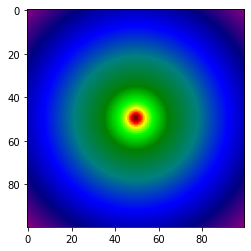

In [11]:
x,y = np.meshgrid(
    np.linspace(-5,5,100),np.linspace(-5,5,100))
ecc,pol = dag_coord_convert(x,y,'cart2pol')
plt.imshow(
    np.flipud(pol), cmap='twilight',
)
plt.savefig(
    opj(rep_path, 'angle_colors.png')
)



cmap = dag_get_cmap('ecc')
plt.imshow(
    np.flipud(ecc), cmap=cmap,
)
plt.savefig(
    opj(rep_path, 'eccentricity_colors.png')
)


In [ ]:
bm = BlendMaker(
    sub=sub,
    fs_dir=fs_dir,
    out_dir=rep_path,
)

In [ ]:
for ses in ['1', '2']:        
    for eye in ['L', 'R']:    
        # g_mask = prf_multi.prf_obj[f'{eye}_{ses}_gauss'].return_vx_mask({'min-rsq':.1})
        # g_pol = prf_multi.prf_obj[f'{eye}_{ses}_gauss'].pd_params.pol.to_numpy()
        # g_ecc = prf_multi.prf_obj[f'{eye}_{ses}_gauss'].pd_params.ecc.to_numpy()
        # bm.add_cmap(
        #     data=g_pol,
        #     surf_name=f'{eye}-session-{ses}-angle',
        #     data_mask=g_mask,
        #     # data_alpha=data_alpha,
        #     vmin = -3.14, vmax=3.14, # min and max values of polar anlge 
        #     cmap = 'pol',
        # )
        # bm.add_cmap(
        #     data=g_ecc,
        #     surf_name=f'{eye}-session-{ses}-eccentricity',
        #     data_mask=g_mask,
        #     # data_alpha=data_alpha,
        #     vmin = 0, vmax=5, # min and max values of polar anlge 
        #     cmap = 'ecc',
        # )                

        c_mask = prf_multi.prf_obj[f'{eye}_{ses}_csf'].return_vx_mask({'min-rsq':.1})
        c_sf0 = prf_multi.prf_obj[f'{eye}_{ses}_csf'].pd_params.sf0.to_numpy()
        bm.add_cmap(
            data=c_sf0,
            surf_name=f'{eye}-session-{ses}-frequency',
            data_mask=c_mask,
            # data_alpha=data_alpha,
            vmin = 0, vmax=6, # min and max values of polar anlge 
            cmap = 'Blues',
            ow=True,
        )           


In [ ]:
surf_list = ['L-session-1-frequency','R-session-1-frequency','L-session-2-frequency', 'R-session-2-frequency']
mesh_list = 'inflated'
for surf in surf_list:
    bm.blender_file_name = opj(rep_path, 'MZ-eye' + surf + '.blend')
    bm.launch_blender(
        surf_list=surf,
        mesh_list=mesh_list,
        save_blender=True,
        close_blender=True,
    )